In [103]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, r2_score, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd

### Задание 1

In [104]:
## ПЕРВЫЙ НАБОР ДАННЫХ

num1 = np.random.randint(100, 200)
#Параметры внешнего и внутреннего колец
center = [0, 0]  
inner_r1 = 5  # внешнее
outer_r1 = 10  
inner_r2 = 1.5 # внутреннее
outer_r2 = 5

# Генерация случайных точек внешнего кольца
t1 = np.random.uniform(0, 2*np.pi, num1)
r1 = np.sqrt(np.random.uniform(inner_r1**2, outer_r1**2, num1))
x1 = center[0] + r1*np.cos(t1)
y1 = center[1] + r1*np.sin(t1)

# Генерация случайных точек внутреннего кольца
t2 = np.random.uniform(0, 2*np.pi, num1)
r2 = np.sqrt(np.random.uniform(inner_r2**2, outer_r2**2, num1))
x2 = center[0] + r2*np.cos(t2)
y2 = center[1] + r2*np.sin(t2)

# Метки классов
labels1 = np.ones(len(x1))  
labels2 = np.zeros(len(x2))  

# Объединение данных и меток классов
X1 = np.vstack((np.vstack((x1, y1)).T, np.vstack((x2, y2)).T))
Y1 = np.hstack((labels1, labels2))

# ВТОРОЙ НАБОР ДАННЫХ
num2 = np.random.randint(100, 200)
x_min, x_max = 0.0, 1.0
y_min, y_max = 0.0, 1.0
x_c1, y_c1 = [], []
x_c2, y_c2 = [], []

for _ in range(num2):
    x = np.random.uniform(x_min, x_max)
    y = np.random.uniform(y_min, y_max)
    if (x < 0.5 and y < 0.5) or (x >= 0.5 and y >= 0.5):
        x_c1.append(x)
        y_c1.append(y)
    else:
        x_c2.append(x)
        y_c2.append(y)
        
labels1 = np.zeros(len(x_c1))
labels2 = np.ones(len(x_c2))

X2 = np.vstack((np.column_stack((x_c1, y_c1)), np.column_stack((x_c2, y_c2))))
Y2 = np.hstack((labels1, labels2))

# ТРЕТИЙ НАБОР ДАННЫХ
num3 = np.random.randint(100, 200)

# Генерация случайных точек для парабол
x1 = np.random.uniform(-1, 1, num3) # Положительная
y1 = -x1**2 +1
x2 = np.random.uniform(0, 2, num3) # Отрицательная
y2 = (x2-1)**2 - 0.4

# Метки классов 
labels1 = np.zeros(len(x1))  
labels2 = np.ones(len(x2))  

# Объединение данных и меток классов
X3 = np.vstack((np.vstack((x1, y1)).T, np.vstack((x2, y2)).T))
Y3 = np.hstack((labels1, labels2))

In [105]:
def graph(X, y):
    # визуализация данных
    plt.figure(figsize=(8, 6))
    plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='purple', label='Class 0')
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='yellow', label='Class 1')
    plt.legend()
    plt.title('Data')
    plt.show()

    # разделение данных на train и test (80/20)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # обучение и тестирование KNN при разных значениях k
    k_values = list(range(1, 9))
    train_accuracy,test_accuracy = [], []

    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        train_predict = knn.predict(X_train)
        test_predict = knn.predict(X_test)
        train_accuracy.append(accuracy_score(y_train, train_predict))
        test_accuracy.append(accuracy_score(y_test, test_predict))

    # построение графиков точности классификации
    plt.figure(figsize=(6, 4))
    plt.plot(k_values, train_accuracy, label='Train Accuracy', marker='o')
    plt.plot(k_values, test_accuracy, label='Test Accuracy', marker='o')
    plt.xlabel('k (Number of Neighbors)')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title('KNN Classifier Accuracy vs. k')
    plt.show()

    # вычисление точности, полноты, F1-меры и построение матрицы расхождений для лучшего k
    best_k = np.argmax(test_accuracy) + 1
    best_knn = KNeighborsClassifier(n_neighbors=best_k)
    best_knn.fit(X_train, y_train)
    y_predict = best_knn.predict(X_test)

    accuracy = accuracy_score(y_test, y_predict)
    precision = precision_score(y_test, y_predict)
    recall = recall_score(y_test, y_predict)
    f1 = f1_score(y_test, y_predict)

    print(f'Best k: {best_k}')
    print(f'Accuracy: {accuracy:.2f}')
    print(f'Precision: {precision:.2f}')
    print(f'Recall: {recall:.2f}')
    print(f'F1 Score: {f1:.2f}')
    conf_matrix = confusion_matrix(y_test, y_predict)
    matrix = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
    matrix.plot()
    plt.show()

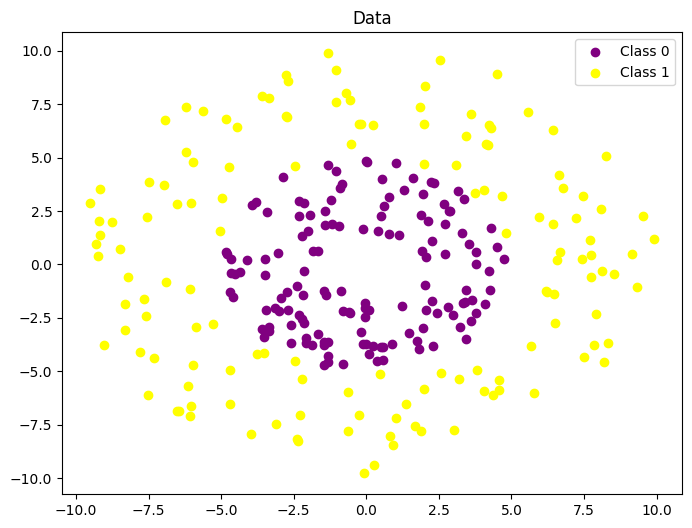

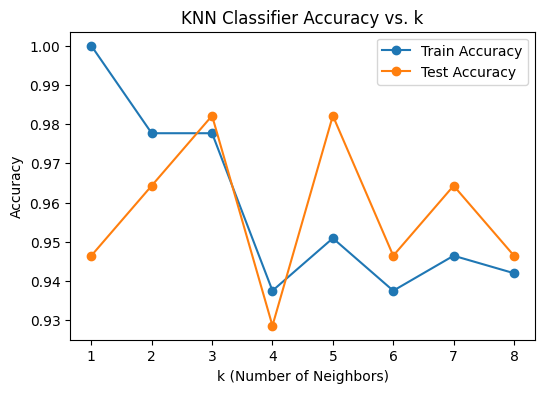

Best k: 3
Accuracy: 0.98
Precision: 1.00
Recall: 0.96
F1 Score: 0.98


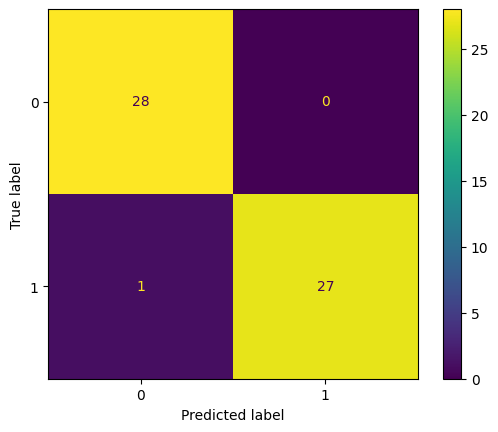

In [106]:
graph(X1,Y1)

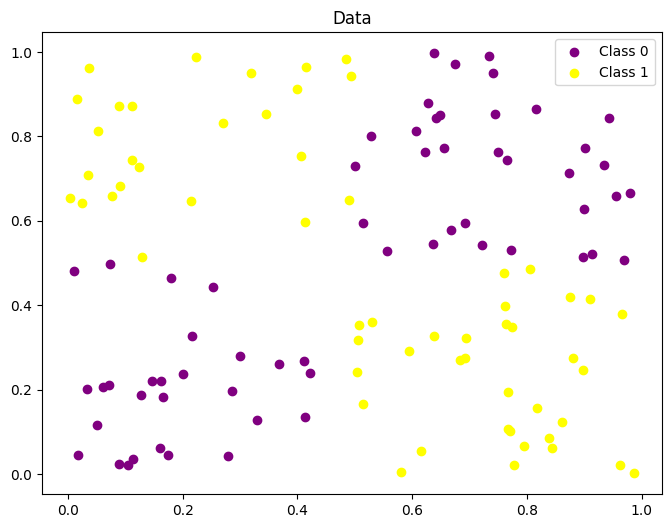

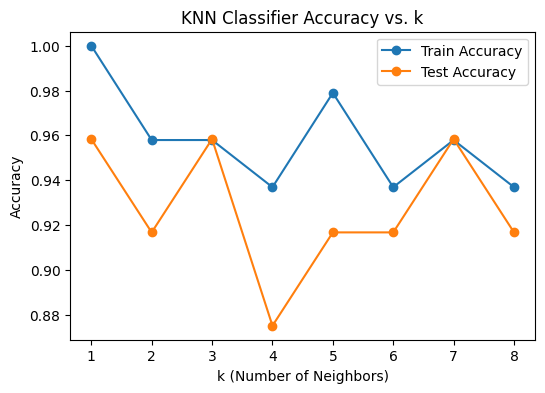

Best k: 1
Accuracy: 0.96
Precision: 1.00
Recall: 0.92
F1 Score: 0.96


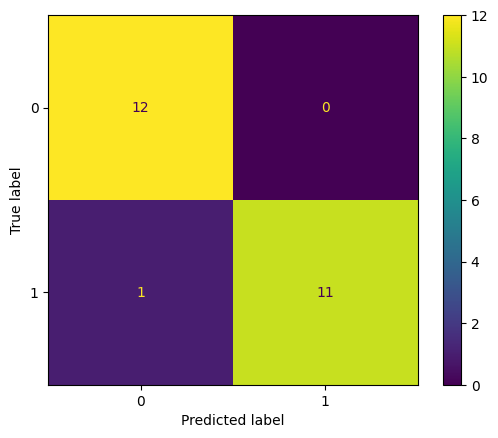

In [107]:
graph(X2, Y2)

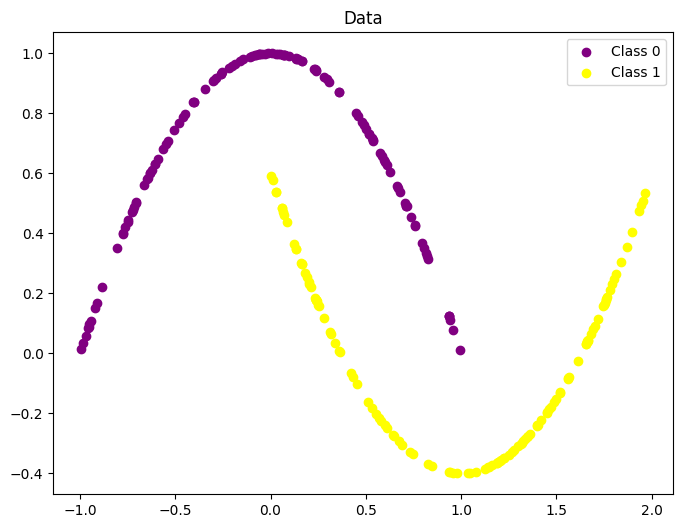

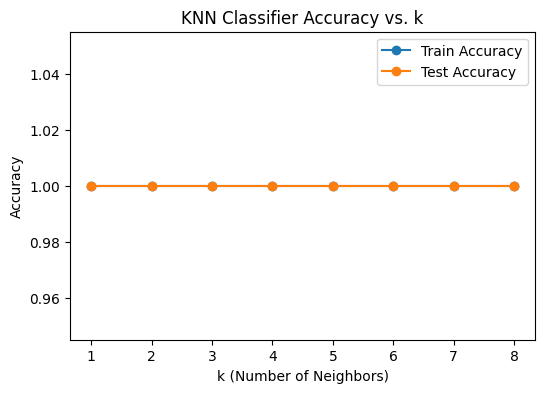

Best k: 1
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00


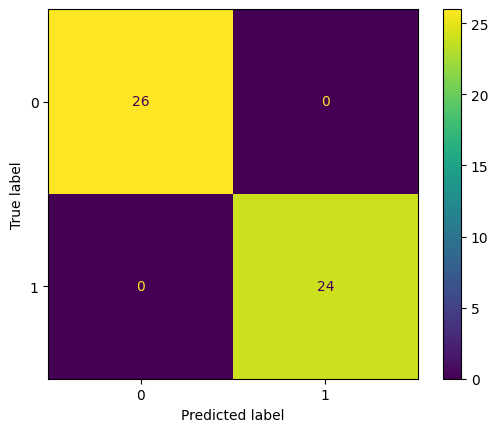

In [108]:
graph(X3, Y3)

### Задание 2

In [109]:
C="Cat"
F="Fish"
H="Hen"

y_true = np.array([C,C,C,C,C,C, F,F,F,F,F,F,F,F,F,F, H,H,H,H,H,H,H,H,H])
y_predict = np.array([C,C,C,C,H,F, C,C,C,C,C,C,H,H,F,F, C,C,C,H,H,H,H,H,H])

classes = [C, F, H]

table = np.zeros((len(classes), 4), dtype=float)
conf_matrix = np.zeros((3, 3), dtype=int)

for true_class, predict_class in zip(y_true, y_predict):
    true_idx = classes.index(true_class)
    predict_idx = classes.index(predict_class)
    conf_matrix[true_idx, predict_idx] += 1


for i, cls in enumerate(classes):
    tp = np.sum((y_true == cls) & (y_predict == cls))
    fp = np.sum((y_true != cls) & (y_predict == cls))
    fn = np.sum((y_true == cls) & (y_predict != cls))

    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    f_score = 2 * (precision * recall) / (precision + recall)
    support = np.sum(y_true == cls)

    table[i, 0] = precision
    table[i, 1] = recall
    table[i, 2] = f_score
    table[i, 3] = support


accuracy = np.sum(y_true == y_predict) / len(y_true)
macro_avg = np.mean(table, axis=0)
weighted_avg = np.average(table, axis=0, weights=table[:, 3])


print(conf_matrix, "\n")
header = ["precision", "recall", "f1-score", "support"]
print(" " * 13 + " ".join(header))
for i, cls in enumerate(classes):
    print(f"{cls:<5}", end=" ")
    print(f"        {table[i, 0]:.3f}   {table[i, 1]:.3f}    {table[i, 2]:.3f}   {int(table[i, 3])}")

print(f"\naccuracy                       {accuracy:.3f}   {len(y_true)}")
print(f"macro avg     {macro_avg[0]:.3f}   {macro_avg[1]:.3f}    {macro_avg[2]:.3f}   {len(y_true)}")
print(f"weighted avg  {weighted_avg[0]:.3f}   {weighted_avg[1]:.3f}    {weighted_avg[2]:.3f}   {len(y_true)}")

[[4 1 1]
 [6 2 2]
 [3 0 6]] 

             precision recall f1-score support
Cat           0.308   0.667    0.421   6
Fish          0.667   0.200    0.308   10
Hen           0.667   0.667    0.667   9

accuracy                       0.480   25
macro avg     0.547   0.511    0.465   25
weighted avg  0.581   0.480    0.464   25


### Задание 3

In [110]:
data = pd.read_csv('Fish.csv')
data.head(10)

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
5,Bream,450.0,26.8,29.7,34.7,13.6024,4.9274
6,Bream,500.0,26.8,29.7,34.5,14.1795,5.2785
7,Bream,390.0,27.6,30.0,35.0,12.6700,4.6900
8,Bream,450.0,27.6,30.0,35.1,14.0049,4.8438
9,Bream,500.0,28.5,30.7,36.2,14.2266,4.9594


In [111]:

# выбор переменных
selected_features = ["Height", "Length1", "Width"] 

# разделение данных на обучающий и тестовый наборы
X = data[selected_features]
y = data['Length2']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# обучение и оценка моделей линейной регрессии
r2_scores = {}

for feature in selected_features:
    model = LinearRegression()
    model.fit(X_train[[feature]], y_train)
    y_train_pred = model.predict(X_train[[feature]])
    y_test_pred = model.predict(X_test[[feature]])

    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)
    r2_scores[feature] = {"R2_train": r2_train, "R2_test": r2_test}

# результаты
for feature, scores in r2_scores.items():
    print(f"Признак: {feature}")
    print(f"R2 train: {scores['R2_train']:.3f}")
    print(f"R2 test: {scores['R2_test']:.3f}")
    print("-----------------------")

best_feature = max(r2_scores, key=lambda k: r2_scores[k]["R2_test"])
print(f"Best R2: {best_feature}")
print(f"Best R2 test: {r2_scores[best_feature]['R2_test']:.3f}")

Признак: Height
R2 train: 0.378
R2 test: 0.526
-----------------------
Признак: Length1
R2 train: 0.999
R2 test: 0.999
-----------------------
Признак: Width
R2 train: 0.740
R2 test: 0.849
-----------------------
Best R2: Length1
Best R2 test: 0.999
